## Student Info

* Student name 1:
* Student ID 1:

* Student name 2:
* Student ID 2:

## Project Info

This project aims to get hands-on experience in implementing some Classification and clustering algorithms taught in Data Mining and Applications course.

There are 2 exercises in this project:
* Binary classification using Decision Tree (ID3 algorithm)
* Data clustering with K-means clustering

## Instructions

### How to finish

To finish the project, fill in:
- ```YOUR CODE HERE``` in code cells

- ```Your answer here``` in text cells.


<font color='red'>**NOTE:**</font>

- Your project must be finished by your own self. You may discuss with the others, but must not copy (partially or entirely) their codes or solutions. You will receive a <font color='red'>0 point</font> for this project if you violate this plagiarism rule.

- You can create new cells to clarify your code / answer, however, please <font color='red'>do not delete any pre-defined code cells or test case cells</font> as it may affect the grading results.

- The given test cases (if any) are used to only assist your code debugging / unit testing. Passing these test cases does not necessarily mean you will get the maximum point for the exercise.

### How to submit

In the grading stage, I will first select `Kernel` - `Restart Kernel & Run All Cells` to restart and run all cells in your notebook. As a result, before submitting your project, you should run `Kernel` - `Restart Kernel & Run All Cells` to ensure your code will run as you expect.

After that, rename your notebook as `ID1_ID2.ipynb` (e.g. `19123_19456.ipynb`) and submit on Moodle.

<font color=red>Please follow the above submission guidelines. Any violation of these instructions may cost you some penalty points!!!</font>


## Exercise 1: Classification (6 points)

### Requirements

You will need to implement Decision Tree algorithm (ID3) in Python language.

**Description**:

- In this exercise, you only need to build a decision tree model using categorical attributes (no need to handle numerical attributes). You may transform numerical attributes into categorical before feeding into classification model.

- A sample belongs to either one of the given labels (binary classification).

- Dataset: [tennis.txt](https://drive.google.com/file/d/1jv67IlMIxGxwGGaP47AZ_1t3mxIn82Y7/view?usp=sharing) and [titanic2.txt](https://drive.google.com/file/d/1IwOxcPz-Hq1_JOOfGylJxy1TYhDvfEsg/view?usp=sharing)


You will need to implement `load_data` function and DecisionTree class with the following methods:

- ```fit```: build tree from given dataset, using ID3 algorithm

- ```predict```: make predictions on new data points using the trained decision tree

- ```visualize```: plot trained decision tree from training dataset. You may choose how to visualize the trained model, as long as the tree structure of the model is clarified (you may use available visualization packages such as ```tree``` or ```graphviz```, or implement the visualization code yourself). For example, a simple representation of a decision tree built from [tennis.txt](https://drive.google.com/file/d/1jv67IlMIxGxwGGaP47AZ_1t3mxIn82Y7/view?usp=sharing) dataset may look like:


```
outlook = sunny
|  humidity = high: no
|  humidity = normal: yes
outlook = overcast: yes
outlook = rainy
|  windy = TRUE: no
|  windy = FALSE: yes
```

**Note**:

- For [tennis.txt](https://drive.google.com/file/d/1jv67IlMIxGxwGGaP47AZ_1t3mxIn82Y7/view?usp=sharing) dataset, you can use all samples for training without spliting into train and test set. For [titanic2.txt](https://drive.google.com/file/d/1IwOxcPz-Hq1_JOOfGylJxy1TYhDvfEsg/view?usp=sharing) dataset, you may need to split into train/test with the ratio of 80/20 (use ```sklearn.model_selection.train_test_split``` with ```random_state=520``` for reproducibility)

- ```load_data``` function and ```DecisionTree``` class must be implemented once only and be usable for different datasets

- For each dataset, you need to ```load_data``` from input files, ```fit``` train dataset into model, use the trained model to ```predict``` on ```X_train``` and ```X_test``` (if any), calculate accuracy (use ```sklearn.metrics.accuracy_score```), and eventually ```visualize``` trained model

### Implementation (6 points)

In [25]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import accuracy_score

In [26]:
Features_name = None
Label = None

In [27]:
# 1

### Description: data loading and categorization (if any)
def load_data(file_path: str, split: bool = True):
    """
    Load data from file_path and return numpy data

    Parameters
    ----------
    file_path : str
        The path of input data file (tab separated).
    split : bool
        Whether or not to return test set.

    Returns
    ----------
    (X_train, y_train)
    
    : training numpy array if split = False, else
    (X_train, y_train), (X_test, y_test): training and testing numpy array if split = True
    """

    # YOUR CODE HERE
    df = pd.read_csv(file_path,sep='\t')
    global Features_name, Label
    X = df.to_numpy()[:, :-1]
    Label,y = np.unique(df.to_numpy()[:, -1] , return_inverse=True)
    Features_name = df.columns.to_numpy()
    if split:
        #test size = 30%
        size = int(len(X)*0.3)
        random = np.random.choice(np.arange(len(X)),size=(size,),replace=False)
        X_test = X[random]
        X_train = X[np.isin(np.arange(len(X)), random, invert=True)]
        y_test = y[random]
        y_train = y[np.isin(np.arange(len(X)), random, invert=True)]
        return (X_train, y_train), (X_test, y_test)
    else :
        return (X, y), (None, None)   

In [28]:
load_data("data/tennis.txt")

((array([['sunny', 'hot', 'high', 'strong'],
         ['overcast', 'hot', 'high', 'weak'],
         ['rain', 'mild', 'high', 'weak'],
         ['rain', 'cool', 'normal', 'weak'],
         ['rain', 'cool', 'normal', 'strong'],
         ['sunny', 'cool', 'normal', 'weak'],
         ['rain', 'mild', 'normal', 'weak'],
         ['overcast', 'mild', 'high', 'strong'],
         ['overcast', 'hot', 'normal', 'weak'],
         ['rain', 'mild', 'high', 'strong']], dtype=object),
  array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)),
 (array([['sunny', 'mild', 'high', 'weak'],
         ['sunny', 'mild', 'normal', 'strong'],
         ['overcast', 'cool', 'normal', 'strong'],
         ['sunny', 'hot', 'high', 'weak']], dtype=object),
  array([0, 1, 1, 0], dtype=int64)))

In [29]:
Label

array(['no', 'yes'], dtype=object)

In [30]:
Features_name

array(['outlook', 'temperature', 'humidity', 'wind', 'playtennis'],
      dtype=object)

In [31]:
# 4

# Decision Tree class
# You should implement the ID3 algorithm here
# You can add other utility methods to make your code easy to read :) 

class DecisionTree:
    def __init__(self, Name = 'root', Column_name = None, Attribute = None):
        self.Name = Name
        self.Attribute = Attribute
        self.Column_name = Column_name
        self.List_nodes = list()
    
    def entropy(self,freq):
        if freq[0] == 0 or freq[1] == 0:
            return 0
        ratio_false = (freq[0]) / np.sum(freq)
        ratio_true  = (freq[1]) / np.sum(freq)
        return -ratio_false*np.log2(ratio_false) - ratio_true*np.log2(ratio_true)         

    def fit(self, X_train, y_train):
        global Features_name , Label
        if self.Name == 'root':
            self.Column_name = Features_name
        
        height, width = X_train.shape
        if width == 0:
            fred = [0, 0]
            for y in y_train:
                fred[y] += 1

            if fred[0] > fred[1]:
                self.List_nodes = [DecisionTree(Name = Label[0], Attribute = Features_name[-1])]
            else: 
                self.List_nodes = [DecisionTree(Name = Label[1], Attribute = Features_name[-1])]
            return 
        # Tạo dictionary để đếm số lần xuất hiện của các giá trị trong mỗi thuộc tính và lưu lại index của các phần tử chứa giá trị đó
        make_decision = [dict() for _ in range(width)]
        Item_transactions = [dict() for _ in range(width)]
        for i in range(height):
            label = y_train[i]
            for (index, value) in enumerate(X_train[i]):
                counter = make_decision[index]
                counter[value] = counter.get(value, [0, 0])
                counter[value][label] += 1
                
                collector = Item_transactions[index]
                collector[value] = collector.get(value, [])
                collector[value].append(i)
        # Tính toán Information Gain để chọn thuộc tính tốt nhất để chia       
        Information_Gain = []
        for (index, counter) in enumerate(make_decision):
            I = 0
            num_ele = np.sum(np.array(list(counter.values())))
            for value in counter.values():
                I += (sum(value)/num_ele)*self.entropy(value)
            Information_Gain.append(I)
        # Chọn thuộc tính có Information Gain nhỏ nhất để chia
        min_index = np.argmin(np.array(Information_Gain))
        # Tạo node DecisionTree mới và đệ quy gọi hàm fit với dữ liệu con
        collector = Item_transactions[min_index]
        counter = make_decision[min_index]
        column_name = self.Column_name[min_index]
        
        X_train = np.delete(X_train, min_index, axis = 1)
        self.Column_name = np.delete(self.Column_name, min_index)
        for (key, indices) in collector.items():
            node = DecisionTree(key, Column_name = self.Column_name, Attribute = column_name)
            if counter[key][0] == 0:
                node.List_nodes = [DecisionTree(Name = Label[1], Attribute = Features_name[-1])]
            elif counter[key][1] == 0:
                node.List_nodes = [DecisionTree(Name = Label[0], Attribute = Features_name[-1])]
            else:
                new_X = np.take(X_train, indices, axis = 0)
                new_y = np.take(y_train, indices, axis = 0)
                node.fit(new_X, new_y)
            self.List_nodes.append(node)

    def Find_node(self, x_test):
        global Label
        for node in self.List_nodes:
            if node.Attribute not in x_test:
                return (int)(node.Name == Label[1])
            if x_test[node.Attribute] == node.Name:
                return node.Find_node(x_test)
        # pruning
        if len(self.List_nodes) == 1:
            return (int)(self.List_nodes[0].Name == Label[1])
        # early stopping
        correct_count = sum([(node.Name == Label[1]) == x_test[node.Attribute] for node in self.List_nodes])
        if correct_count / len(self.List_nodes) >= 0.9:
            return (int)(self.List_nodes[0].Name == Label[1])
        node = np.random.choice(self.List_nodes)
        x_test[node.Attribute] = node.Name
        return self.Find_node(x_test)
        
    def predict(self, X_test):
        global Features_name , Label
        y_pred = np.ones(len(X_test), dtype = int)
        
        for (index, x_test) in enumerate(X_test):
            x_test = dict(zip(Features_name, x_test))
            y_pred[index] = self.Find_node(x_test)
        return y_pred

    def visualize(self, prefix=''):
        print(str(prefix) + str(self.Attribute) + ' = ' + str(self.Name) + ' :')
        if len(self.List_nodes) > 0:
            for i in range(len(self.List_nodes)):
                self.List_nodes[i].visualize(prefix + '\t')


In [32]:
# 0.5 = 0.25 (tennis dataset) + 0.25 (titanic2 dataset) 
### NOTE: Flow to run your code (do this for all your datasets)
# dataset 1 (create one cell for each dataset with the following content)
model = DecisionTree()
(X_train, y_train), (X_test, y_test)= load_data("data/tennis.txt")
model.fit(X_train, y_train)
y_pred = model.predict(X_train) 
train_model = accuracy_score(y_train, y_pred)
y_pred = model.predict(X_test) 
test_model = accuracy_score(y_test, y_pred)
print("Accurancy on train data: ",train_model)
print("Accurancy on test data: ",test_model)
print("================================== Tree ===============================================\n")
model.visualize()

Accurancy on train data:  1.0
Accurancy on test data:  1.0
================================== Tree ===============================================

None = root :
	outlook = sunny :
		humidity = high :
			playtennis = no :
		humidity = normal :
			playtennis = yes :
	outlook = overcast :
		playtennis = yes :
	outlook = rain :
		wind = weak :
			playtennis = yes :
		wind = strong :
			playtennis = no :


In [33]:
model = DecisionTree()
(X_train, y_train), (X_test, y_test)= load_data("data/titanic2.txt")
model.fit(X_train, y_train)
y_pred = model.predict(X_train) 
train_model = accuracy_score(y_train, y_pred)
y_pred = model.predict(X_test) 
test_model = accuracy_score(y_test, y_pred)
print("Accurancy on train data: ",train_model)
print("Accurancy on test data: ",test_model)
print("================================== Tree ===============================================\n")
model.visualize()

Accurancy on train data:  0.7955872809863724
Accurancy on test data:  0.7727272727272727
================================== Tree ===============================================

None = root :
	sex = male :
		pclass = 1st :
			age = adult :
				survived = no :
			age = child :
				survived = yes :
		pclass = 2nd :
			age = adult :
				survived = no :
			age = child :
				survived = yes :
		pclass = 3rd :
			age = adult :
				survived = no :
			age = child :
				survived = no :
		pclass = crew :
			age = adult :
				survived = no :
	sex = female :
		pclass = 1st :
			age = adult :
				survived = yes :
		pclass = 2nd :
			age = adult :
				survived = yes :
			age = child :
				survived = yes :
		pclass = 3rd :
			age = adult :
				survived = no :
			age = child :
				survived = yes :
		pclass = crew :
			age = adult :
				survived = yes :


### Answer the following question (0.5 points)

**Question 1:** Your comments on the accuracy scores between train and test sets on ```titanic2``` dataset? Elaborate, explain and propose a solution

---

1. in dataset tennis , accurancy of train data alway get max value but in test data the result have more change because test data is random so sometimes the value not in tree so will be return false leads to a change accurancy.To propose a solution , I think the dataset must be added more data for train . 
2. in dataset titanic2 , accurancy of train and test data there's not much of a difference about 80% so i think , model is not overfitting but the accuracy does not reach the maximum value because the features od dataset not clear distinction . We can add more feature have high distinct so model can get maximun value of accurancy

## Exercise 2: Clustering (4 points + 1 bonus point)

### Requirements

In this exercise, you will need to implement K-means clustering algorithm on synthetic data.

In [34]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial.distance import cdist

**Dataset:**

- The synthetic dataset contains 1500 data points that belong to 3 clusters. The clusters' centers are respectively $(2,2), (7,3), (3,6)$. 

- Data points of each cluster are generated randomly from the bivariate normal distribution

In [35]:
seed = 520 # for reproducibility

In [36]:
### Description: generate synthetic data

def generate_data(means, cov, N, K):
    np.random.seed(seed) 
    X0 = np.random.multivariate_normal(means[0], cov, N)
    X1 = np.random.multivariate_normal(means[1], cov, N)
    X2 = np.random.multivariate_normal(means[2], cov, N)

    X = np.concatenate((X0, X1, X2), axis = 0)
    original_label = np.asarray([0]*N + [1]*N + [2]*N).T

    return X, original_label


# visualize data 
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()

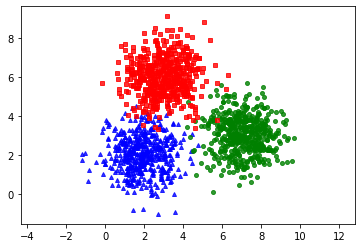

In [37]:
N, K = 500, 3
means = [[2, 2], [7, 3], [3, 6]]
cov = [[1, 0], [0, 1]]

X, original_label = generate_data(means, cov, N, K)
kmeans_display(X, original_label)

You will need to fill in the ```YOUR CODE HERE``` to finish K-means clustering algorithm

### Implementation (4 points)

In [38]:
# 0.5
def kmeans_init_centers(X, k):
    np.random.seed(seed)

    # randomly pick k rows of X as initial centers using np.random.choice function
    
    # YOUR CODE HERE
    centers = np.random.choice(X.shape[0], k, replace=False)
    return X[centers]
    

In [39]:
centers = kmeans_init_centers(X, K)
assert centers.shape == (K, 2)

In [40]:
# 1
def kmeans_assign_labels(X, centers):
    # calculate pairwise distances between data and centers using cdist
    # return index of the closest center using np.argmin

    # YOUR CODE HERE
    distances = cdist(X, centers)
    return np.argmin(distances, axis=1)

In [41]:
assigned_labels = kmeans_assign_labels(X, centers)
assert assigned_labels.shape == (N*3, )

In [42]:
# 1đ 
def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        # take average

        # YOUR CODE HERE
        Xk = X[labels == k, :]
        # Take the mean along the rows to find the updated center
        centers[k, :] = np.mean(Xk, axis=0)
    return centers

In [43]:
# 0.5
def has_converged(centers, new_centers):
    # return True if two sets of centers are the same

    # YOUR CODE HERE
    return np.allclose(centers, new_centers)

In [44]:
# 1
def kmeans(X, K):
    # save the center coordinates of each iteration
    centers = [kmeans_init_centers(X, K)]  
    # save the labels of each iteration
    labels = []
    it = 0 
    while True:
        # at each iteration:
        # 1. assign label for each points and append to labels
        # 2. update the centers
        # 3. check the convergence condition
        #    and append NEW center coordinates to centers
        # 4. update iteration 

        # YOUR CODE HERE
        labels.append(kmeans_assign_labels(X, centers[-1]))
        # Update the centers
        new_centers = kmeans_update_centers(X, labels[-1], K)
        # Check the convergence condition and append NEW center coordinates to centers
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        # Update iteration 
        it += 1
    
    return (centers, labels, it)

Centers found by k-means algorithm:
[[2.96402177 6.01105837]
 [7.03594941 3.05108601]
 [1.92067563 2.03188976]]


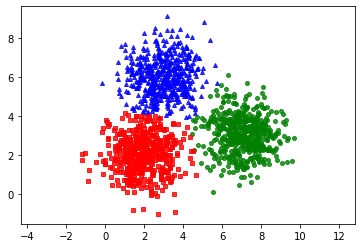

In [45]:
(centers, labels, it) = kmeans(X, K)
print('Centers found by k-means algorithm:')
print(centers[-1])
print('='*60)

kmeans_display(X, labels[-1])

### Answer the following questions (bonus 1 point)

**Question 2:** Your comments on the result of K-means algorithm on the synthetic dataset? (0.25)

---

The result of K-means algorithm on the synthetic dataset is efficient operation, small error, fast clustering

**Question 3:** 

- Drawbacks of K-means clustering algorithm (0.5)
  
    - The parameter $k$ cannot be learned but must be set manually, the number of phrases must be known in advance, or it will have to be tried many different times
  
    - Depends on the starting center, the dependence increases as the number of phrases becomes large

    - Sensitive to noise, when there are many, the center is strongly skewed or divided into another cluster
  
    - Not effective with clusters with special shapes such as circles, clusters that surround each other
- Propose solutions to the drawbacks you stated above (0.25)
  
    - To address the issue of setting the parameter k manually, there are various techniques such as the elbow method, silhouette analysis, and gap statistic that can be used to determine the optimal number of clusters based on the data.

    - To overcome the sensitivity of K-means to the initial center, techniques such as K-means++ can be used to choose the initial centers in a more intelligent way to achieve a better convergence.

    - To address the sensitivity of K-means to noise, techniques such as robust K-means or fuzzy K-means can be used to deal with outliers and noise points.

    - To handle clusters with non-circular shapes, algorithms such as DBSCAN, Mean Shift, or Spectral Clustering can be used, as they are more flexible in detecting clusters with irregular shapes.
  
--- References:
    https://developers.google.com/machine-learning/clustering/algorithm/advantages-disadvantages?hl=vi


